In [3]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize


In [4]:
import mpld3
# mpld3.enable_notebook()
%matplotlib notebook
# %matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (15,5)

In [5]:
home = pd.read_csv('home.csv')

In [8]:
home.head()

,Usage [kW],Generation [kW],L1 Voltage [V],L2 Voltage [V],POWER [kW],POWER* [kVA],POWER-FACTOR [],LIGHTS [A],MICROWAVE [A],KITCHEN1 [A],DRYER [A],HEATING1 [A],RANGE2 [A],BATHROOM [A],WASHER [A],AC [A],DISHWASHER [A],MAINS1 [A],MAINS2 [A]
Date & Time,,,,,,,,,,,,,,,,,,,
2019-12-02 15:59:00-08:00,-0.056467,-0.0,121.964839,122.675972,-0.056467,0.178250,0.316900,0.674183,0.148333,0.147550,0.149817,0.146817,0.178467,0.143317,0.144550,0.145167,0.142033,0.884350,0.571750
2019-12-02 16:00:00-08:00,-0.056350,-0.0,121.951922,122.534439,-0.056350,0.177883,0.316833,0.675283,0.147067,0.145317,0.150167,0.146867,0.177283,0.143183,0.144383,0.145850,0.141600,0.882017,0.572433
2019-12-02 16:01:00-08:00,-0.055833,-0.0,121.809689,122.383439,-0.055833,0.177833,0.313950,0.674583,0.145883,0.148850,0.150817,0.146517,0.177250,0.142133,0.144933,0.145250,0.141033,0.884183,0.571617
2019-12-02 16:02:00-08:00,-0.055917,-0.0,121.924756,122.493822,-0.055917,0.178850,0.312717,0.673567,0.147450,0.146567,0.151217,0.146167,0.176750,0.142367,0.143500,0.144767,0.141383,0.884233,0.578617
2019-12-02 16:03:00-08:00,-0.056150,-0.0,121.948189,122.537556,-0.056150,0.179183,0.313567,0.674950,0.146000,0.148150,0.152050,0.146567,0.177533,0.143583,0.144433,0.147017,0.141550,0.885467,0.579583


In [7]:
home['Date & Time'] = pd.to_datetime(home['Date & Time'], utc=True)
home.set_index('Date & Time', inplace=True)
home.index = home.index.tz_convert('America/Los_Angeles')
home = home.sort_index()

In [9]:
home.columns

Index(['Usage [kW]', 'Generation [kW]', 'L1 Voltage [V]', 'L2 Voltage [V]',
       'POWER [kW]', 'POWER* [kVA]', 'POWER-FACTOR []', 'LIGHTS [A]',
       'MICROWAVE [A]', 'KITCHEN1 [A]', 'DRYER [A]', 'HEATING1 [A]',
       'RANGE2 [A]', 'BATHROOM [A]', 'WASHER [A]', 'AC [A]', 'DISHWASHER [A]',
       'MAINS1 [A]', 'MAINS2 [A]'],
      dtype='object')

In [10]:
mains = home['MAINS1 [A]']+home['MAINS2 [A]']

<IPython.core.display.Javascript object>


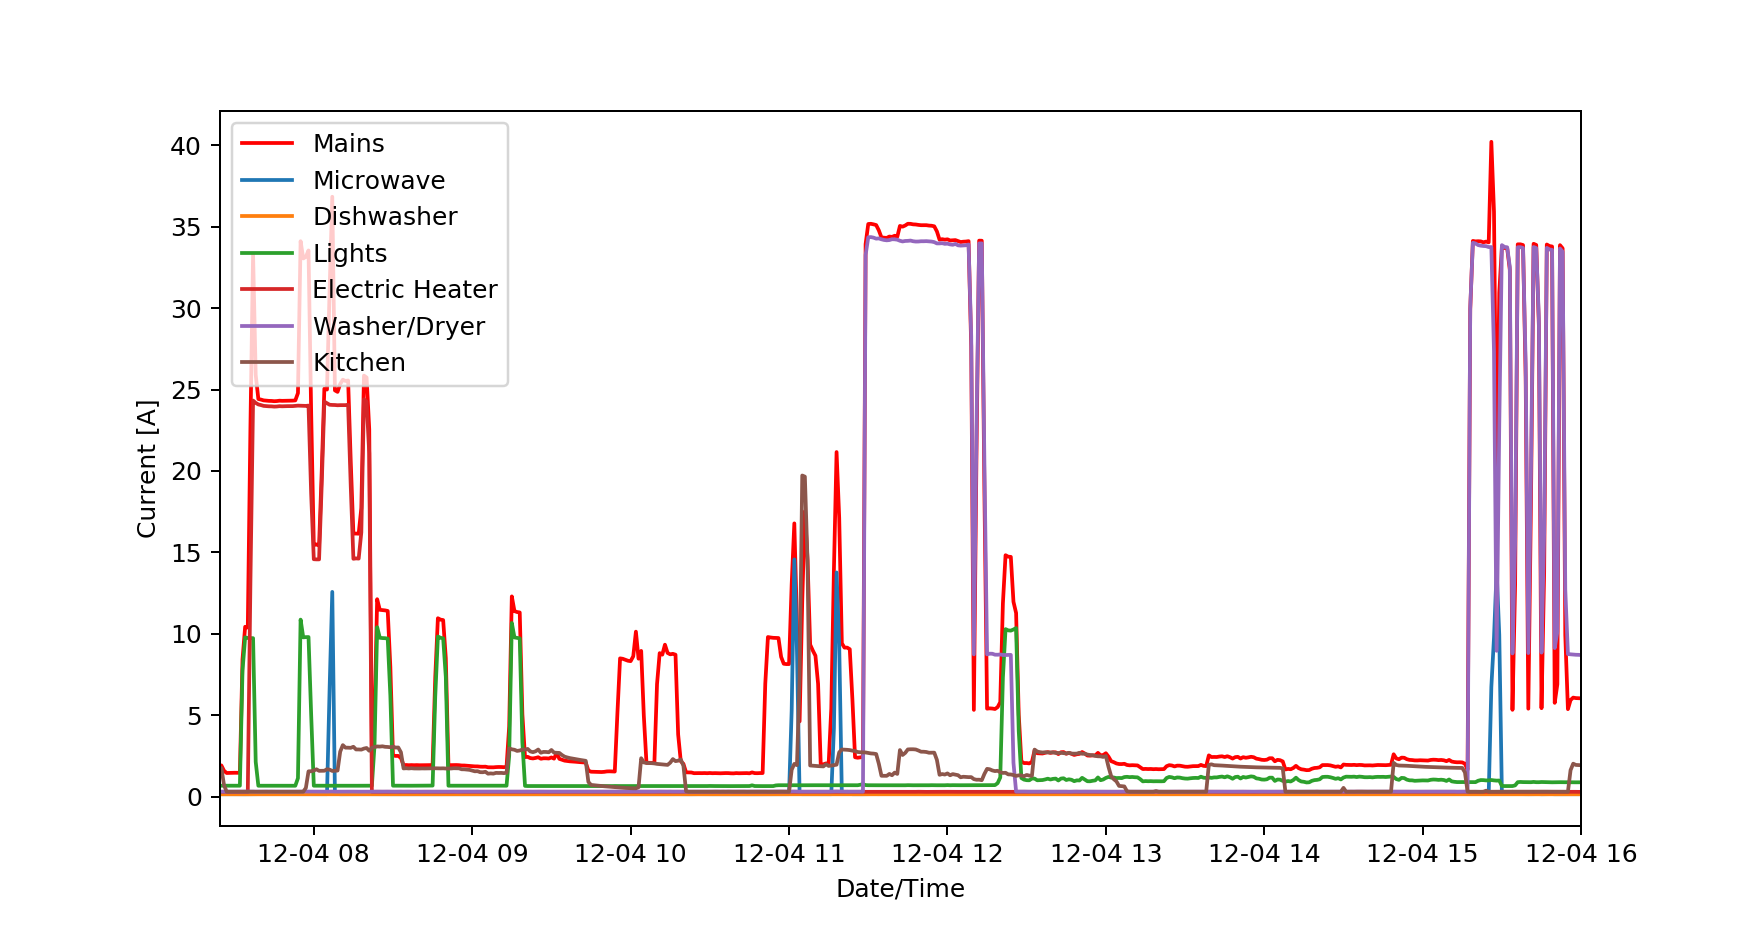

Text(0, 0.5, 'Current [A]')

In [21]:
plt.plot(mains, color='r',label='Mains')
plt.plot(home['MICROWAVE [A]'], label='Microwave')
plt.plot(home['DISHWASHER [A]'],label='Dishwasher')
plt.plot(home['LIGHTS [A]'],label='Lights')
plt.plot(home['HEATING1 [A]']*2, label='Electric Heater')
plt.plot(home['DRYER [A]']*2, label='Washer/Dryer')
plt.plot(home['KITCHEN1 [A]']*2, label='Kitchen')
plt.legend()
plt.xlabel('Date/Time')
plt.ylabel('Current [A]')
